## Introduction to linear regression using Numpy

## Generate sample data



In [ ]:
import numpy as np

x = np.linspace(0, 100, num=1000)

noise = np.random.randn(1000)
y = 2 * x + 1 + noise

print("First 5 values of x:")
print(x[:5])
print("\nFirst 5 values of y:")
print(y[:5])

First 5 values of x:
[0.        0.1001001 0.2002002 0.3003003 0.4004004]

First 5 values of y:
[1.37793932 1.96768119 3.42792708 2.26684287 2.33377262]


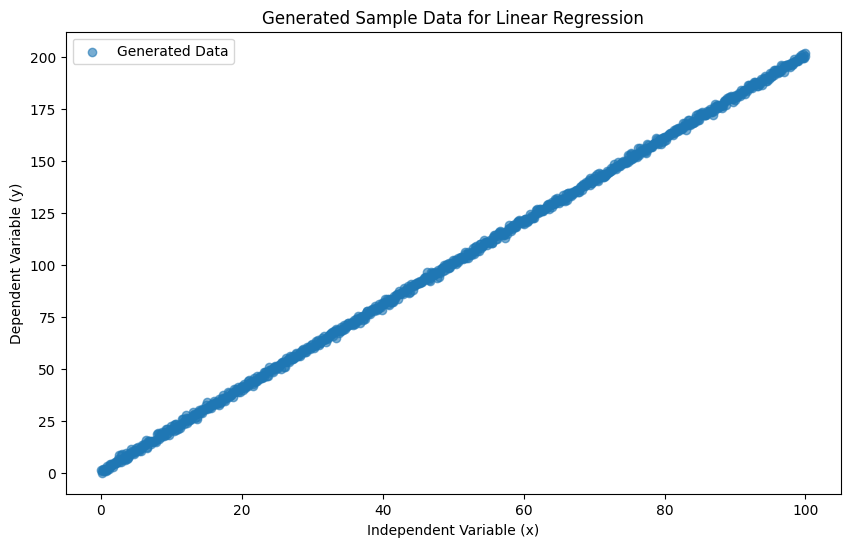

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Generated Data', alpha=0.6)

plt.xlabel("Independent Variable (x)")
plt.ylabel("Dependent Variable (y)")
plt.title("Generated Sample Data for Linear Regression")

plt.legend()

plt.show()

## Split data

Divide the generated sample data into training, validation, and test sets.


In [ ]:
total_size = len(x)
train_size = int(0.8 * total_size)
test_size = int(0.2 * total_size)

x_train = x[:train_size]
y_train = y[:train_size]

x_test = x[train_size :]
y_test = y[train_size  :]

print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (800,)
Shape of y_train: (800,)
Shape of x_test: (200,)
Shape of y_test: (200,)


## Linear regression model class


## Implementing training loop

We start with training samples $\{(x_i, y_i)\}_{i=1}^n$, where $x_i \in \mathbb{R}$ (input) and $y_i \in \mathbb{R}$ (target).

$$
X =
\begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
\vdots & \vdots \\
x_n & 1
\end{bmatrix}
\in \mathbb{R}^{n \times 2},
\quad
y =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
\in \mathbb{R}^{n \times 1}.
$$

The least-squares solution is given by the equation:
$$
w = (X^\top X)^{-1} X^\top y,
\quad
w \in \mathbb{R}^{2 \times 1}.
$$

**Step 1: Transpose**
$$
X^\top \in \mathbb{R}^{2 \times n}.
$$

**Step 2: Matrix multiplication**
$$
X^\top X \in \mathbb{R}^{2 \times 2},
\quad
X^\top y \in \mathbb{R}^{2 \times 1}.
$$

**Step 3: Inverse and product**
$$
(X^\top X)^{-1} \in \mathbb{R}^{2 \times 2},
\quad
w = (X^\top X)^{-1} X^\top y \in \mathbb{R}^{2 \times 1}.
$$

Finally, the two components of $w$ are:
$$
w =
\begin{bmatrix}
w_1 \\[6pt]
w_2
\end{bmatrix}
=
\begin{bmatrix}
\text{trained_weight} \\[6pt]
\text{trained_bias}
\end{bmatrix}.
$$

Thus, the learned model is:
$$
\hat{y} = (\text{trained_weight}) \cdot x + (\text{trained_bias}).
$$


In [ ]:
x_reshaped = x_train.reshape(-1, 1)
X = np.hstack([x_reshaped, np.ones((len(x_train), 1))])
print(X.shape)
X_transpose = X.T

XTX = X_transpose @ X

XTX_inv = np.linalg.inv(XTX)

XTy = X_transpose @ y_train

weights = XTX_inv @ XTy

trained_weight = weights[0]
trained_bias = weights[1]

print("Trained Weight:", trained_weight)
print("Trained Bias:", trained_bias)

(800, 2)
Trained Weight: 2.000273673501058
Trained Bias: 0.9841483095280211


## Evaluate on test set

Evaluate the trained model on the test set to assess its performance on unseen data.


In [ ]:
y_pred_test = trained_weight * x_test + trained_bias

mse_test = np.mean((y_test - y_pred_test)**2)

print("Mean Squared Error on Test Set:", mse_test)

Mean Squared Error on Test Set: 0.8591134602761146


## Visualize results


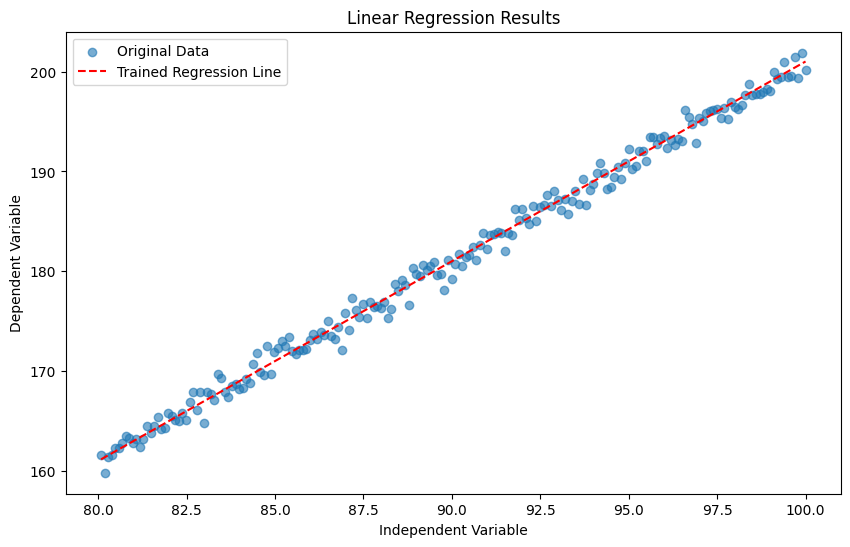

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, label='Original Data', alpha=0.6)

plt.plot(x_test, y_pred_test, color='red', linestyle='--', label='Trained Regression Line')

plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.title("Linear Regression Results")

plt.legend()
plt.show()

## For multi-dimensional X



In [ ]:

num_samples = 1000
num_features = 3

x = np.random.rand(num_samples, num_features)

true_weights = np.array([2, 3, 4])
true_bias = 1

noise = np.random.randn(num_samples)
y = x @ true_weights + true_bias + noise

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

print("\nFirst 5 rows of x:")
print(x[:5])
print("\nFirst 5 values of y:")
print(y[:5])

Shape of x: (1000, 3)
Shape of y: (1000,)

First 5 rows of x:
[[0.7129008  0.75348112 0.0181902 ]
 [0.5370365  0.88100178 0.97516883]
 [0.63218781 0.62332184 0.76623846]
 [0.94187848 0.01185144 0.75997532]
 [0.19983528 0.297303   0.82099356]]

First 5 values of y:
[3.11318277 9.22539273 7.95921195 5.89137818 5.75953896]


## Split the multi-dimensional data



In [ ]:
total_size = len(x)
train_size = int(0.8 * total_size)


x_train = x[:train_size]
y_train = y[:train_size]


x_test = x[train_size :]
y_test = y[train_size :]

print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (800, 3)
Shape of y_train: (800,)
Shape of x_test: (200, 3)
Shape of y_test: (200,)


## Implementing training loop (general $d$-dimensional case)

We start with training samples $\{(x_i, y_i)\}_{i=1}^n$, where $x_i \in \mathbb{R}^d$ (input vector of $d$ features) and $y_i \in \mathbb{R}$ (target).

$$
X =
\begin{bmatrix}
x_{1,1} & x_{1,2} & \cdots & x_{1,d} & 1 \\
x_{2,1} & x_{2,2} & \cdots & x_{2,d} & 1 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
x_{n,1} & x_{n,2} & \cdots & x_{n,d} & 1
\end{bmatrix}
\in \mathbb{R}^{n \times (d+1)},
\quad
y =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
\in \mathbb{R}^{n \times 1}.
$$

The least-squares solution is given by the **normal equation**:
$$
w = (X^\top X)^{-1} X^\top y,
\quad
w \in \mathbb{R}^{(d+1) \times 1}.
$$

**Step 1: Transpose**
$$
X^\top \in \mathbb{R}^{(d+1) \times n}.
$$

**Step 2: Matrix multiplication**
$$
X^\top X \in \mathbb{R}^{(d+1) \times (d+1)},
\quad
X^\top y \in \mathbb{R}^{(d+1) \times 1}.
$$

**Step 3: Inverse and product**
$$
(X^\top X)^{-1} \in \mathbb{R}^{(d+1) \times (d+1)},
\quad
w = (X^\top X)^{-1} X^\top y \in \mathbb{R}^{(d+1) \times 1}.
$$

Finally, the $(d+1)$ components of $w$ are:
$$
w =
\begin{bmatrix}
w_1 \\[6pt]
w_2 \\[6pt]
\vdots \\[6pt]
w_d \\[6pt]
w_{d+1}
\end{bmatrix}
=
\begin{bmatrix}
\text{weights for features} \\[6pt]
\text{bias term}
\end{bmatrix}.
$$

Thus, the learned model is:
$$
\hat{y} = w_1 x_1 + w_2 x_2 + \cdots + w_d x_d + w_{d+1}.
$$


In [ ]:
X_train = np.hstack([x_train, np.ones((x_train.shape[0], 1))])

X_train_transpose = X_train.T

XTX = X_train_transpose @ X_train

XTX_inv = np.linalg.inv(XTX)

XTy = X_train_transpose @ y_train

trained_weights = XTX_inv @ XTy

print("Trained Weights:", trained_weights)

Trained Weights: [1.95104939 2.72074266 4.06069628 1.16484148]


## Evaluate on test set for multi-dimensional data



In [ ]:
X_test = np.hstack([x_test, np.ones((x_test.shape[0], 1))])

y_pred_test = X_test @ trained_weights

mse_test = np.mean((y_test - y_pred_test)**2)

print("Mean Squared Error on Test Set:", mse_test)

Mean Squared Error on Test Set: 0.8960550397912687


## Regression on linearly dependent data



In [ ]:
num_samples = 100
num_independent_features = 2

independent_features = np.random.randint(0, 100, size=(num_samples, num_independent_features))

dependent_feature = independent_features[:, 0] + independent_features[:, 1]

x = np.hstack([dependent_feature.reshape(-1, 1),independent_features])

true_weights = np.array([5, -2, 1])
true_bias = 10

noise = np.random.randn(num_samples)
y = x @ true_weights + true_bias + noise

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

print("\nFirst 5 rows of x:")
print(x[:5])
print("\nFirst 5 values of y:")
print(y[:5])

Shape of x: (100, 3)
Shape of y: (100,)

First 5 rows of x:
[[134  87  47]
 [ 90  64  26]
 [ 52   8  44]
 [123  61  62]
 [ 52  17  35]]

First 5 values of y:
[554.2808494  358.03520855 298.26323457 564.03150677 271.16098057]


## Inverse of $X^TX$ may fail

Let $X \in \mathbb{R}^{n \times (d+1)}$

If $rank(X) = k < d+1$

Then $rank(X^TX) = rank(X) = k < d+1$

$\implies X$ is not full rank, and hence not invertible.

In [ ]:
X = np.hstack([x, np.ones((x.shape[0], 1))])
XTX = X.T @ X
try:
    XTX_inv = np.linalg.inv(XTX)
    print("\nXTX inverse calculated successfully:")
    print(XTX_inv)
except np.linalg.LinAlgError as e:
    print("\nError: Could not compute the inverse of XTX.")
    print("Reason:", e)



Error: Could not compute the inverse of XTX.
Reason: Singular matrix


## Can try Pseudo-inverse

### np.linalg.pinv(matrix) - The Moore-Penrose psuedo inverse

The pseudo-inverse of a matrix A, denoted $A^+$
, is “the matrix that ‘solves’ [the least-squares problem] $Aw = b$
,” i.e., if $\bar{w}$
 is said solution, then $A^+$
 is that matrix such that $\bar{w} = A^+b$
.

In [ ]:
X_train = np.hstack([x, np.ones((x.shape[0], 1))])

# X_train_transpose = X_train.T

# XTX = X_train_transpose @ X_train

# XTX_inv = np.linalg.inv(XTX)

# XTy = X_train_transpose @ yy

trained_weights = np.linalg.pinv(X_train) @ y

print("Trained Weights:", trained_weights)

Trained Weights: [3.00996781 0.01486831 2.9950995  8.99525629]


### We had: $$ y = 5x_1 - 2x_2 + x_3 + 10$$
And $x_1 = x_2 + x_3$
$\implies y = 3x_2 + 6x_3 + 10$

## Identify the linearly dependent column




In [ ]:
dependent_col_index = -1
original_rank = np.linalg.matrix_rank(x)
print(f"Original rank of x: {original_rank}")

for i in range(x.shape[1]):
    temp_x = np.delete(x, i, axis=1)
    temp_rank = np.linalg.matrix_rank(temp_x)
    print(f"Rank after removing column {i}: {temp_rank}")

    if temp_rank == original_rank:
        dependent_col_index = i
        break

if dependent_col_index != -1:
    print(f"\nIdentified linearly dependent column index: {dependent_col_index}")
else:
    print("\nNo linearly dependent column found.")

if dependent_col_index != -1:
    x_cleaned = np.delete(x, dependent_col_index, axis=1)
    print("Shape of original x:", x.shape)
    print("Shape of x_cleaned after removing the dependent feature:", x_cleaned.shape)
else:
    x_cleaned = x.copy()
    print("No dependent column removed. x_cleaned is a copy of the original x.")

Original rank of x: 2
Rank after removing column 0: 2

Identified linearly dependent column index: 0
Shape of original x: (100, 3)
Shape of x_cleaned after removing the dependent feature: (100, 2)


## Perform linear regression on cleaned data



In [ ]:
X_cleaned = np.hstack([x_cleaned, np.ones((x_cleaned.shape[0], 1))])

X_cleaned_transpose = X_cleaned.T

XTX_cleaned = X_cleaned_transpose @ X_cleaned

XTX_cleaned_inv = np.linalg.inv(XTX_cleaned)

XTy_cleaned = X_cleaned_transpose @ y

trained_weights_cleaned = XTX_cleaned_inv @ XTy_cleaned

print("Trained Weights on Cleaned Data:", trained_weights_cleaned)

Trained Weights on Cleaned Data: [ 2.994015    5.9936435  10.69643895]
